In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv("data/mouse_drug_data.csv")
mouse_drug


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
...,...,...
245,i669,Placebo
246,r850,Placebo
247,a262,Placebo
248,q787,Placebo


In [2]:
clinical_trial = pd.read_csv("data/clinicaltrial_data.csv")
clinical_trial

# Combine the data into a single dataset
merged_df = pd.merge(clinical_trial, mouse_drug,how='outer', on="Mouse ID")

# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [3]:
# use describe function to get the statistical data 
merged_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


## Tumor Response to Treatment

In [4]:
# extract only columns "Drug", "Timepoint" and "Tumor Volume (mm3)" and store in a dataframe
tumor_volume_df = merged_df.loc[:,['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,45.651331
2,Capomulin,10,43.270852
3,Capomulin,15,43.784893
4,Capomulin,20,42.731552


In [5]:
# Group tumor_vol_df by 'Drug' and 'Timepoint'
# Calculate mean and standard error of the mean (sem) for the 'Tumor Volume'
mean_sem_tumorvolume = tumor_volume_df.groupby(['Drug', 'Timepoint']).agg({"Tumor Volume (mm3)" :["mean", "sem"]})
mean_sem_tumorvolume.head()


Tumor Volume (mm3)          
                                  mean       sem
Drug      Timepoint                             
Capomulin 0                  45.000000  0.000000
          5                  44.266086  0.448593
          10                 43.084291  0.702684
          15                 42.064317  0.838617
          20                 40.716325  0.909731

In [6]:
#Get the mean value for each drug
cap_tumorvolume_mean = mean_sem_tumorvolume.loc['Capomulin'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
inf_tumorvolume_mean = mean_sem_tumorvolume.loc['Infubinol'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
ket_tumorvolume_mean = mean_sem_tumorvolume.loc['Ketapril'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
plc_tumorvolume_mean = mean_sem_tumorvolume.loc['Placebo'].loc[:, 'Tumor Volume (mm3)'].loc[:,'mean'].tolist()
cap_tumorvolume_mean

[45.0,
 44.26608641544399,
 43.08429058188399,
 42.0643173468125,
 40.71632532212173,
 39.939527826868186,
 38.76933928855454,
 37.81683888251364,
 36.958000810895236,
 36.23611379944763]

In [7]:
#Get the sem value for each drug
cap_tumorvolume_sem = mean_sem_tumorvolume.loc['Capomulin'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
inf_tumorvolume_sem = mean_sem_tumorvolume.loc['Infubinol'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
ket_tumorvolume_sem = mean_sem_tumorvolume.loc['Ketapril'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()
plc_tumorvolume_sem = mean_sem_tumorvolume.loc['Placebo'].loc[:, 'Tumor Volume (mm3)'].loc[:,'sem'].tolist()

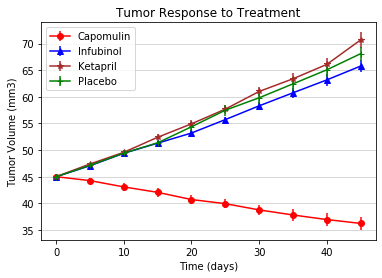

In [8]:
ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

# Plot the 'mean' list vs. the established x axis with error 
ax.errorbar(x_axis, cap_tumorvolume_mean, yerr=cap_tumorvolume_sem, fmt="red",marker="o",
                   label="Capomulin")
ax.errorbar(x_axis, inf_tumorvolume_mean, yerr=inf_tumorvolume_sem, fmt="blue",marker="^",
                   label="Infubinol")
ax.errorbar(x_axis, ket_tumorvolume_mean, yerr=ket_tumorvolume_sem, fmt="brown",marker="*",
                   label="Ketapril")
ax.errorbar(x_axis, plc_tumorvolume_mean, yerr=plc_tumorvolume_sem, fmt="green",marker="+",
                   label="Placebo")

# Add the legend and gridlines
ax.legend(loc=2)
ax.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5)
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# extract only columns "Drug", "Timepoint" and "Metastatic Sites" and store in a dataframe
meta_df = merged_df.loc[:,['Drug', 'Timepoint', 'Metastatic Sites']]
meta_df.head()

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0
1,Capomulin,5,0
2,Capomulin,10,0
3,Capomulin,15,0
4,Capomulin,20,0


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
mean_sem_meta = meta_df.groupby(['Drug', 'Timepoint']).agg({"Metastatic Sites" :["mean", "sem"]})
mean_sem_meta.head()

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites          
                                mean       sem
Drug      Timepoint                           
Capomulin 0                 0.000000  0.000000
          5                 0.160000  0.074833
          10                0.320000  0.125433
          15                0.375000  0.132048
          20                0.652174  0.161621

In [11]:
#Get the mean value for each drug
cap_meta_mean = mean_sem_meta.loc['Capomulin'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
inf_meta_mean = mean_sem_meta.loc['Infubinol'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
ket_meta_mean = mean_sem_meta.loc['Ketapril'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()
plc_meta_mean = mean_sem_meta.loc['Placebo'].loc[:, 'Metastatic Sites'].loc[:,'mean'].tolist()

# Get sem value for each drug

cap_meta_sem = mean_sem_meta.loc['Capomulin'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
inf_meta_sem = mean_sem_meta.loc['Infubinol'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
ket_meta_sem = mean_sem_meta.loc['Ketapril'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()
plc_meta_sem = mean_sem_meta.loc['Placebo'].loc[:, 'Metastatic Sites'].loc[:,'sem'].tolist()

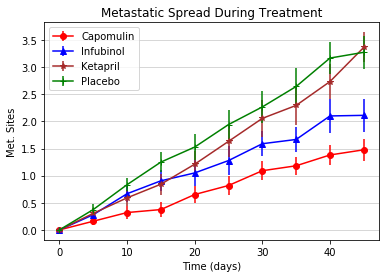

In [12]:

# Scatter plot showing metastatic spread over time for each treatment

ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Met. Sites")

# Plot the 'mean' list vs. the established x axis with error 
ax.errorbar(x_axis, cap_meta_mean, yerr=cap_meta_sem, fmt="red",marker="o",
                   label="Capomulin")
ax.errorbar(x_axis, inf_meta_mean, yerr=inf_meta_sem, fmt="blue",marker="^",
                   label="Infubinol")
ax.errorbar(x_axis, ket_meta_mean, yerr=ket_meta_sem, fmt="brown",marker="*",
                   label="Ketapril")
ax.errorbar(x_axis, plc_meta_mean, yerr=plc_meta_sem, fmt="green",marker="+",
                   label="Placebo")

# Add the legend and gridlines
ax.legend(loc=2)
ax.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5)
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

countofmice = merged_df.groupby(['Drug', 'Timepoint'])['Timepoint'].count()
countofmice.head()

# Convert to DataFrame

# Preview DataFrame


Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Timepoint, dtype: int64

In [14]:
# Create lists of the mouse counts for each of the four drugs at the different timepoints
cap_countofmice_list = countofmice.loc['Capomulin'].tolist()
inf_countofmice_list = countofmice.loc['Infubinol'].tolist()
ket_countofmice_list = countofmice.loc['Ketapril'].tolist()
plc_countofmice_list = countofmice.loc['Placebo'].tolist()

In [15]:
#Get percentage for each drug list
cap_percentage = [(x/cap_countofmice_list[0])*100 for x in cap_countofmice_list]
inf_percentage = [(x/inf_countofmice_list[0])*100 for x in inf_countofmice_list]
ket_percentage = [(x/ket_countofmice_list[0])*100 for x in ket_countofmice_list]
plc_percentage = [(x/plc_countofmice_list[0])*100 for x in plc_countofmice_list]

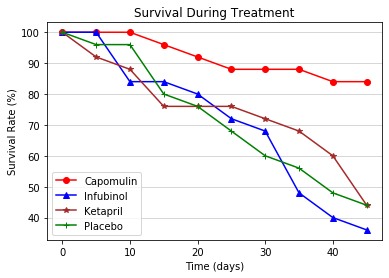

In [16]:
# Scatter plot showing mouse survival rate over time for each treatment

ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Survival During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")

# Plot the percentage with x axis with error 
ax.errorbar(x_axis, cap_percentage, fmt="red",marker="o",
                   label="Capomulin")
ax.errorbar(x_axis, inf_percentage, fmt="blue",marker="^",
                   label="Infubinol")
ax.errorbar(x_axis, ket_percentage, fmt="brown",marker="*",
                   label="Ketapril")
ax.errorbar(x_axis, plc_percentage, fmt="green",marker="+",
                   label="Placebo")

# Add the legend and gridlines
ax.legend(loc=3)
ax.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5)
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug

# Display the data to confirm
# compares the total % tumor volume change for each drug across the full 45 days.
cap_tumorvolume_change = int(((cap_tumorvolume_mean[-1] - cap_tumorvolume_mean[0])/cap_tumorvolume_mean[0])*100)
inf_tumorvolume_change = int(((inf_tumorvolume_mean[-1] - inf_tumorvolume_mean[0])/inf_tumorvolume_mean[0])*100)
ket_tumorvolume_change = int(((ket_tumorvolume_mean[-1] - ket_tumorvolume_mean[0])/ket_tumorvolume_mean[0])*100)
plc_tumorvolume_change = int(((plc_tumorvolume_mean[-1] - plc_tumorvolume_mean[0])/plc_tumorvolume_mean[0])*100)


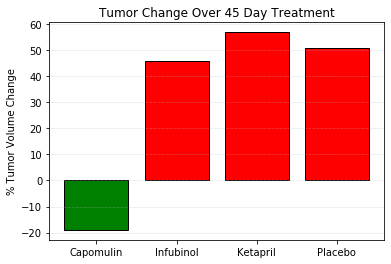

In [18]:
# Store all Relevant Percent Changes into a Tuple

# y values using a list
y = [cap_tumorvolume_change, inf_tumorvolume_change, ket_tumorvolume_change, plc_tumorvolume_change]
# Set the x axis with the len(y)
x_axis = np.arange(len(y))

# Splice the data between passing and failing drugs
#negatives are read and postives are blue
colors = []
for drugs in y:
    if drugs < 0:
        colors.append('green')
    else:
        colors.append('red')


# Set up the bar graph 
tumor_growth_bar = plt.bar(x_axis, y, color=colors, edgecolor="black")

# Set the plot title and axes titles
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

        
# Orient widths. Add labels, tick marks, etc. 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])

# Add gridlines
plt.grid('on', which='major', axis='y', linestyle='dotted', linewidth=0.5)

plt.savefig('drugAnalysis.png')


# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)